In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])

"AB"

In [2]:
R, X, Y, L, F, Y, PY = load_big_dataset(dataset_name);

Dataset : AB_B

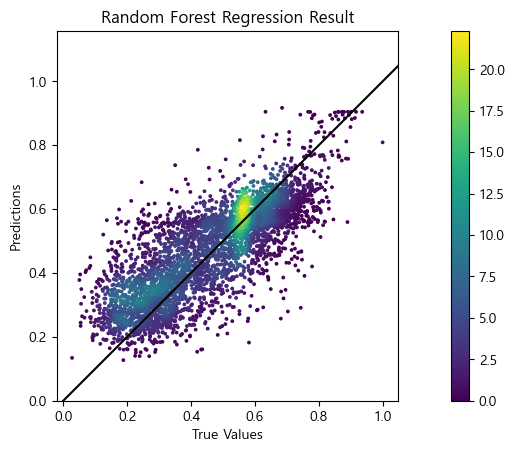

NRMSE : 0.116087


In [3]:
view_result(PY, Y, data_state);

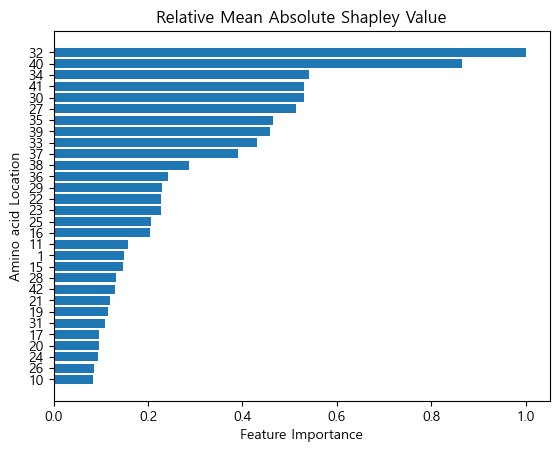

In [4]:
view_importance(R, L, F, show_number=30);